Welcome to "NLP: Twitter Sentiment Analysis". This is a project-based course that should take approximately 1.5 hours to finish. Before diving into the project, please take a look at the course objectives and structure:

 

Course Objectives

In this course, we are going to focus on the following learning objectives:

Apply python libraries to import and visualize datasets
Perform exploratory data analysis and plot word-cloud
Perform text data cleaning such as removing punctuation and stop words
Understand the concept of count vectorization (tokenization)
Perform tokenization to tweet text using Scikit Learn
Understand the theory and intuition behind Naïve Bayes classifiers
Understand the difference between prior probability, posterior probability and likelihood
Train Naïve Bayes classifier models using Scikit-Learn to preform classification
Evaluate the performance of trained Naïve Bayes Classifier model using confusion matrices
Course Structure

This course is divided into 3 parts:

Project Overview: This introductory reading material will walk you through the project.
NLP: Twitter Sentiment Analysis: This is the hands-on project that we will work on in Rhyme.
Graded Quiz: This is the final assignment that you need to pass in order to finish the course successfully.
Project Structure

Task #1: Understand the Problem Statement and business case

1) NLP work by converting text into 
numbers.

2) These numbers are then used to train an AI/ML model to make predictions.

3) In this case study we will analyze thousands of twitter tweets to predict people's sentiment.

Task #2: Import libraries and datasets

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
twitter_df = pd.read_csv("train.csv")

In [ ]:
twitter_df

id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]

In [ ]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [ ]:
twitter_df.describe()

id         label
count  31962.000000  31962.000000
mean   15981.500000      0.070146
std     9226.778988      0.255397
min        1.000000      0.000000
25%     7991.250000      0.000000
50%    15981.500000      0.000000
75%    23971.750000      0.000000
max    31962.000000      1.000000

In [ ]:
twitter_df["tweet"]

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [ ]:
twitter_df.drop("id", axis = 1, inplace = True)

In [ ]:
twitter_df

label                                              tweet
0          0   @user when a father is dysfunctional and is s...
1          0  @user @user thanks for #lyft credit i can't us...
2          0                                bihday your majesty
3          0  #model   i love u take with u all the time in ...
4          0             factsguide: society now    #motivation
...      ...                                                ...
31957      0  ate @user isz that youuu?ðððððð...
31958      0    to see nina turner on the airwaves trying to...
31959      0  listening to sad songs on a monday morning otw...
31960      1  @user #sikh #temple vandalised in in #calgary,...
31961      0                   thank you @user for you follow  

[31962 rows x 2 columns]

Task #3: Perform Exploratory Data Analysis

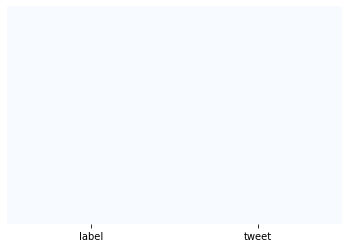

In [ ]:
sns.heatmap(twitter_df.isnull(), yticklabels = False, cbar = False, cmap = "Blues")
#finding null values


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbec36f2ed0>]],
      dtype=object)

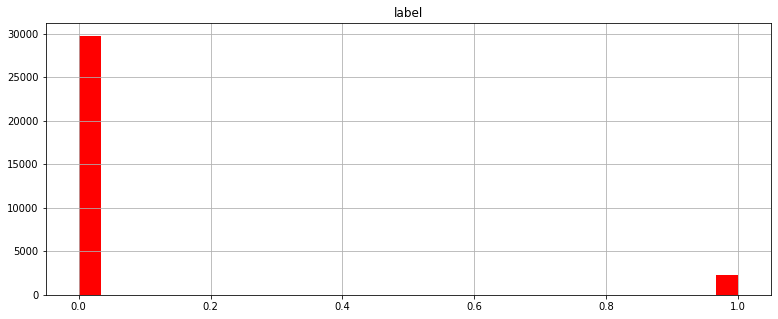

In [ ]:
twitter_df.hist(bins = 30, figsize = (13,5), color = "r")

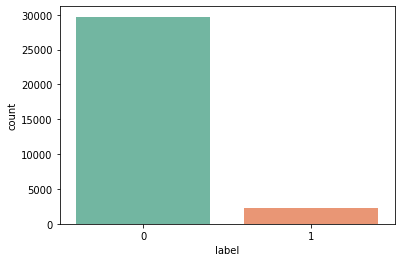

In [ ]:
sns.countplot(x = twitter_df["label"], data = twitter_df, palette = "Set2")

In [ ]:
twitter_df["length"] = twitter_df["tweet"].apply(len)

In [ ]:
twitter_df

label                                              tweet  length
0          0   @user when a father is dysfunctional and is s...     102
1          0  @user @user thanks for #lyft credit i can't us...     122
2          0                                bihday your majesty      21
3          0  #model   i love u take with u all the time in ...      86
4          0             factsguide: society now    #motivation      39
...      ...                                                ...     ...
31957      0  ate @user isz that youuu?ðððððð...      68
31958      0    to see nina turner on the airwaves trying to...     131
31959      0  listening to sad songs on a monday morning otw...      63
31960      1  @user #sikh #temple vandalised in in #calgary,...      67
31961      0                   thank you @user for you follow        32

[31962 rows x 3 columns]

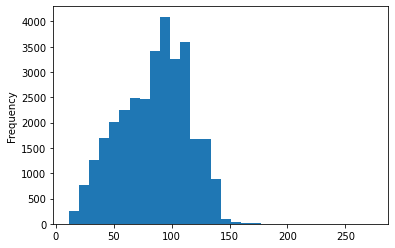

In [ ]:
twitter_df["length"].plot(kind ="hist", bins = 30)

In [ ]:
twitter_df.describe()

label        length
count  31962.000000  31962.000000
mean       0.070146     84.739628
std        0.255397     29.455749
min        0.000000     11.000000
25%        0.000000     63.000000
50%        0.000000     88.000000
75%        0.000000    108.000000
max        1.000000    274.000000

In [ ]:
twitter_df.describe()["label"]["mean"]

0.07014579813528565

In [ ]:
twitter_df[twitter_df["length"]==11]["tweet"].iloc[0]

'i love you '

In [ ]:
twitter_df[twitter_df["length"]==84]["tweet"].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

In [ ]:
positive = twitter_df[twitter_df["label"]==0]

In [ ]:
positive

label                                              tweet  length
0          0   @user when a father is dysfunctional and is s...     102
1          0  @user @user thanks for #lyft credit i can't us...     122
2          0                                bihday your majesty      21
3          0  #model   i love u take with u all the time in ...      86
4          0             factsguide: society now    #motivation      39
...      ...                                                ...     ...
31956      0  off fishing tomorrow @user carnt wait first ti...      61
31957      0  ate @user isz that youuu?ðððððð...      68
31958      0    to see nina turner on the airwaves trying to...     131
31959      0  listening to sad songs on a monday morning otw...      63
31961      0                   thank you @user for you follow        32

[29720 rows x 3 columns]

In [ ]:
negative = twitter_df[twitter_df["label"]==1]

In [ ]:
negative

label                                              tweet  length
13         1  @user #cnn calls #michigan middle school 'buil...      74
14         1  no comment!  in #australia   #opkillingbay #se...     101
17         1                             retweet if you agree!       22
23         1    @user @user lumpy says i am a . prove it lumpy.      47
34         1  it's unbelievable that in the 21st century we'...     104
...      ...                                                ...     ...
31934      1  lady banned from kentucky mall. @user  #jcpenn...      59
31946      1  @user omfg i'm offended! i'm a  mailbox and i'...      82
31947      1  @user @user you don't have the balls to hashta...     112
31948      1   makes you ask yourself, who am i? then am i a...      87
31960      1  @user #sikh #temple vandalised in in #calgary,...      67

[2242 rows x 3 columns]

Task #4: Plot the word cloud

In [ ]:
sentences = twitter_df["tweet"].tolist()

In [ ]:
len(sentences)

31962

In [ ]:
sentences_as_one_string = " ".join(sentences)

In [ ]:
sentences_as_one_string

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run @user @user thanks for #lyft credit i can\'t use cause they don\'t offer wheelchair vans in pdx.    #disapointed #getthanked   bihday your majesty #model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦    factsguide: society now    #motivation [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo    @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦ the next school year is the year for exams.ð\x9f\x98¯ can\'t think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦   @user @user welcome here !  i\'m   it\'s so #gr8 !   â\x86\x9d #ireland consumer price index (mom) climbed from pre

In [ ]:
pip install WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud

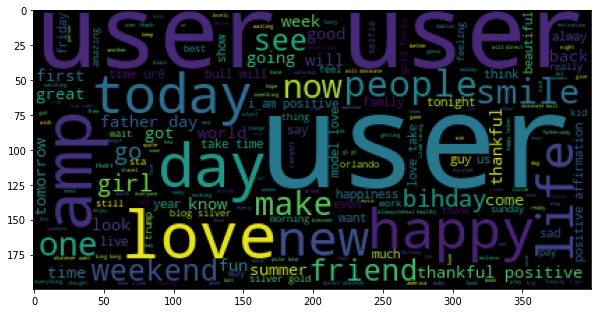

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(WordCloud().generate(sentences_as_one_string))


It shows the bigger the text, more important it is

In [ ]:
negative_sent = negative["tweet"].tolist()

In [ ]:
negatives_string = " ".join(negative_sent)

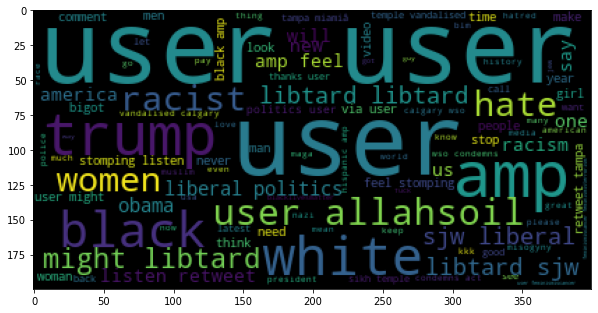

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(negatives_string))

Task #5: Perform data cleaning - removing punctuation

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
Test = 'Good morning beautiful people :)....I ma having fun learning machine learning and artificial intelligence'

In [ ]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]

In [ ]:
Test_punc_removed

['G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 'I',
 ' ',
 'm',
 'a',
 ' ',
 'h',
 'a',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'u',
 'n',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'm',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'a',
 'r',
 't',
 'i',
 'f',
 'i',
 'c',
 'i',
 'a',
 'l',
 ' ',
 'i',
 'n',
 't',
 'e',
 'l',
 'l',
 'i',
 'g',
 'e',
 'n',
 'c',
 'e']

In [ ]:
Test_punc_removed_joined = "".join(Test_punc_removed)

In [ ]:
Test_punc_removed_joined

'Good morning beautiful people I ma having fun learning machine learning and artificial intelligence'

In [ ]:
for char in Test:
  for punc in string.punctuation:
    if char==punc:
      Test_str2 = Test.replace(char,"")

In [ ]:
for char in Test:
  if char in string.punctuation:
      Test_str3 = Test.replace(char,"")

In [ ]:
Test

'Good morning beautiful people :)....I ma having fun learning machine learning and artificial intelligence'

Task #6: Perform data cleaning - remove stop words

In [ ]:
import nltk  # Natural language tool kit
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
Test_punc_removed_joined

'Good morning beautiful people I ma having fun learning machine learning and artificial intelligence'

In [ ]:
Test_punc_removed_joined_clean =[word for word in Test_punc_removed_joined.split() if word.lower() not in stopwords.words("english")]

In [ ]:
Test_punc_removed_joined_clean

['Good',
 'morning',
 'beautiful',
 'people',
 'fun',
 'learning',
 'machine',
 'learning',
 'artificial',
 'intelligence']

In [ ]:
min_challenge = "Here is a mini challenge. that will teach you how to remove stopwords and punctuations!"

In [ ]:
min_challenge_punc = "".join([char for char in min_challenge if char not in string.punctuation])
min_challenge_punc_stop = [word for word in min_challenge_punc.split() if word.lower() not in stopwords.words("english") ]

In [ ]:
min_challenge_punc_stop

['mini', 'challenge', 'teach', 'remove', 'stopwords', 'punctuations']

Task #7: Perform Count Vectorization (Tokenization)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first !!paper', 'This paper  is the second paper', 'And this is the third one', 'Is this the first paper?']

vectorizer = CountVectorizer()
x = vectorizer.fit_transform(sample_data)

In [ ]:
print(vectorizer.get_feature_names())

['and', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(x.toarray())

[[0 1 1 0 1 0 1 0 1]
 [0 0 1 0 2 1 1 0 1]
 [1 0 1 1 0 0 1 1 1]
 [0 1 1 0 1 0 1 0 1]]


In [ ]:
min_challenge = ["Hello World", "Hello Hello World", "Hello World World World"]

In [ ]:
x = vectorizer.fit_transform(min_challenge)
print(vectorizer.get_feature_names())

['hello', 'world']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(x.toarray())

[[1 1]
 [2 1]
 [1 3]]


Task #8: Create a pipeline to remove stop-words, punctuation, and perform tokenization

In [ ]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]

In [ ]:
Test_punc_removed

['G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 'I',
 ' ',
 'm',
 'a',
 ' ',
 'h',
 'a',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'u',
 'n',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'm',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'a',
 'r',
 't',
 'i',
 'f',
 'i',
 'c',
 'i',
 'a',
 'l',
 ' ',
 'i',
 'n',
 't',
 'e',
 'l',
 'l',
 'i',
 'g',
 'e',
 'n',
 'c',
 'e']

In [ ]:
def message_cleaning(message):
  Test_punc_removed = [char for char in message if char not in string.punctuation]
  Test_punc_removed_join = "".join(Test_punc_removed)
  Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words("english")]
  return Test_punc_removed_join_clean

In [ ]:
twitter_df_clean = twitter_df["tweet"].apply(message_cleaning)  #one by one it applies function message_cleaning to the tweets

In [ ]:
twitter_df_clean[5]

['22',
 'huge',
 'fan',
 'fare',
 'big',
 'talking',
 'leave',
 'chaos',
 'pay',
 'disputes',
 'get',
 'allshowandnogo']

In [ ]:
twitter_df["tweet"][5]

'[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  '

In [ ]:
vectorizer = CountVectorizer(analyzer = message_cleaning) #it will preprocess the tweet with the function message_cleaning and then apply vectorizer
tweets_countvectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(twitter_df["tweet"]).toarray()

In [ ]:
tweets_countvectorizer.shape

(31962, 47386)

In [ ]:
X = tweets_countvectorizer

In [ ]:
y = twitter_df['label']

In [ ]:
#vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8')
X = vectorizer.fit_transform(twitter_df["tweet"])


In [ ]:
vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['0',
 '0000001',
 '00027',
 '001',
 '0035',
 '00h30',
 '01',
 '0115',
 '0161',
 '019',
 '01926889917',
 '02',
 '0265',
 '0266808099',
 '02900',
 '03',
 '030916',
 '03111880779',
 '032',
 '033',
 '0345',
 '039',
 '04',
 '045',
 '04k',
 '05',
 '0506823156',
 '06',
 '06052016',
 '0606',
 '060616',
 '0608',
 '0608wed',
 '0609',
 '0610',
 '061116',
 '0612',
 '0613',
 '0616',
 '0617',
 '0618',
 '0618saturday7monthscouple',
 '0618â\x99¡',
 '0620',
 '06202016',
 '0622',
 '0624',
 '06Â',
 '07',
 '07000',
 '07040',
 '07044',
 '07150',
 '07190',
 '07400',
 '07468',
 '07500',
 '076',
 '07788427999',
 '07800',
 '07840',
 '07850',
 '07870',
 '07900',
 '07930',
 '07950',
 '08',
 '0806',
 '080616',
 '088b',
 '08â\x80¦',
 '09',
 '09062016',
 '0933m',
 '09600',
 '0k',
 '0shares',
 '0tolerancemovie',
 '0ð\x9f\x98¥â\x98¹ï¸\x8f',
 '1',
 '10',
 '100',
 '1000',
 '100000',
 '10003',
 '10007',
 '1000gifts',
 '1000th',
 '1000x',
 '1000yr',
 '1000â\x82¬',
 '1001',
 '1001000s',
 '10014',
 '10021',
 '10025',
 '10

Task #9: Understand the theory and intuition behind Naive Bayes classifiers

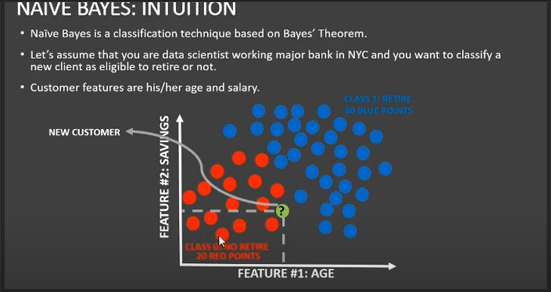

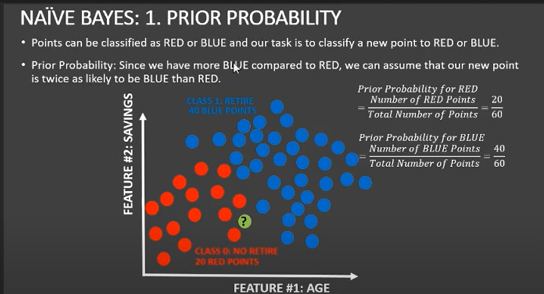
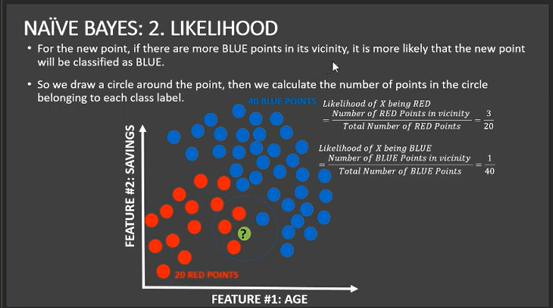
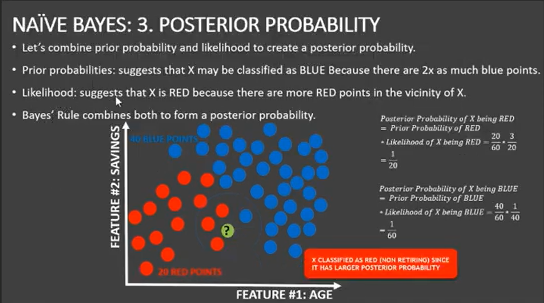

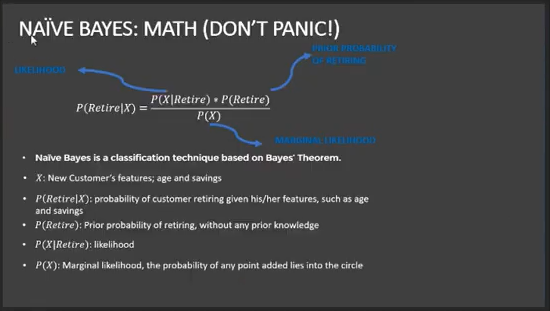

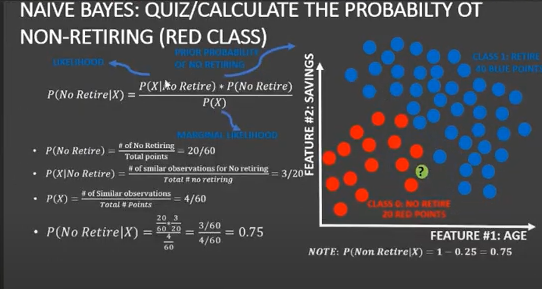

Task #10: Train a Naive Bayes Classifier

In [ ]:
X.shape

(31962, 47386)

In [ ]:
y.shape

(31962,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)

MultinomialNB()

Task #11: Assess trained model performance

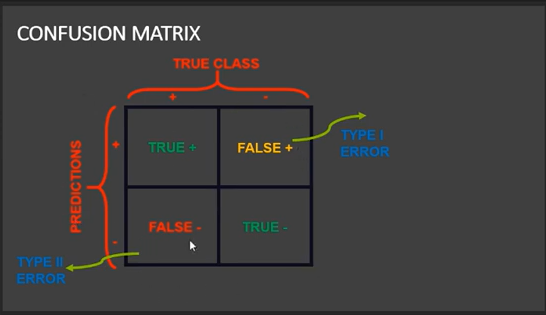

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

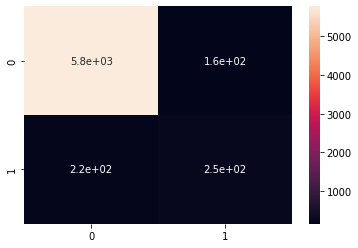

In [ ]:
y_predict_test = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [ ]:
cm

array([[5772,  158],
       [ 215,  248]])

Upsample
Downsample
Additional feature engineering


In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5930
           1       0.61      0.54      0.57       463

    accuracy                           0.94      6393
   macro avg       0.79      0.75      0.77      6393
weighted avg       0.94      0.94      0.94      6393



In [ ]:
_test